# About the notebook

the goal is to compare the amount of calibration and the quality of alignment for each MPSK prior.

/data/clintko/SMPK/ep8cs_dat_cal_prior05.txt

In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(parallelDist)))
suppressWarnings(suppressMessages(library(clue)))
library(IRdisplay)

dat_dir = "/data/clintko/SMPK"

# Import data

In [2]:
dat_mpsk_raw     = suppressWarnings(suppressMessages(
    read_delim(file.path(dat_dir, "ep8cs_dat_raw.txt"),          delim = "\t")))

dat_mpsk_cal_tmp = suppressWarnings(suppressMessages(
    read_delim(file.path(dat_dir, "ep8cs_dat_cal_prior05.txt"),  delim = "\t")))

In [14]:
mat1 = dat_mpsk_raw     #%>% filter(sample == "01")
mat1 = mat1 %>% select(-sample)

mat2 = dat_mpsk_cal_tmp #%>% filter(sample == "01")
mat2 = mat2 %>% select(-sample, -cluster)

In [20]:
mat = dat_mpsk_cal_tmp %>% select(-sample, -cluster)
print(dim(mat))
head(mat)

[1] 180000     10


FSC-A,SSC-A,Aqua,CD3,CD4,CD8,TNFa,IL2,IFNg,CD107a
-0.9842315,-0.1617934,-0.7955210,0.7132072,2.0106275,0.5643775,-0.2908997,-0.3925173,-0.2096025,0.40067177
-0.8060286,-0.7211010,1.0939212,-0.7572396,-0.9339503,0.7456509,-0.5466336,-0.6194544,-0.2948700,-0.26224944
0.7526911,-0.7974094,-1.3902461,-0.5761031,-0.9750655,-2.1139920,-0.8549018,-0.7492773,-0.3063636,-0.09130085
-1.4107753,-0.6418969,-0.9332702,0.1690909,1.5790134,-0.2303025,-0.6566822,-0.3508929,-0.4462522,-0.22035063
-1.3797180,0.2627113,-0.6280187,-0.7401072,1.8247117,-1.3967039,-0.7424917,-0.5940440,-0.8248705,-0.05589467
-0.1230367,-0.3440197,-0.5626711,-0.7087743,0.2174651,-0.9449249,-0.3466591,2.0498633,0.1050453,0.15165899


In [21]:
distance = parDist(as.matrix(mat))

In [116]:
print(class(distance))
print(attr(distance, "Size"))
print(attr(distance, "method"))

[1] "dist"
[1] 180000
[1] "euclidean"


In [117]:
distance[1]

[1] 3.917119

In [16]:
cumsum(1:10)

[1]  1  3  6 10 15 21 28 36 45 55

In [38]:
n = 10
idx     = 1:(n-1)
idx2 = idx * n - cumsum(idx)
idx1 = idx2 - (n-2):0
print(idx)
print(idx2)
print(idx1)

[1] 1 2 3 4 5 6 7 8 9
[1]  9 17 24 30 35 39 42 44 45
[1]  1 10 18 25 31 36 40 43 45


In [55]:
allclose = function(mat1, mat2, tol = 10^(-5)){
    dif = sum((mat1 - mat2)^2)
    return(dif < tol)
} # end fun

get_dist_index1 = function(n){
    ###
    idx_dist = 1:(n * (n - 1) / 2)
    
    ###
    index = sapply(1:(n-1), function(idx_cur){
        idx_pre = idx_cur - 1
        idx1 = idx_pre * n - sum(1:idx_pre) + 1
        idx1 = max(idx1, 1)
        idx2 = idx_cur * n - sum(1:idx_cur)
        
        zeros = rep(0, idx_cur)
        return(c(zeros, idx_dist[idx1:idx2]))
    }) # end sapply
    
    return(index)   
} # end fun

get_dist_index2 = function(n){
    ###
    idx_dist = 1:(n * (n - 1) / 2)
    idxs = 1:(n-1)
    idx2 = idxs * n - cumsum(idxs)
    idx1 = idx2 - (n-2):0
    
    ###
    index = sapply(idxs, function(idx){
        zeros = rep(0, idx)
        i1 = idx1[idx]; i2 = idx2[idx]
        return(c(zeros, idx_dist[i1:i2]))
    }) # end sapply
    
    return(index) 
} # end fun


n = 5
N = 2 * n
mat2 = get_dist_index2(N)
mat1 = get_dist_index1(N)
print(paste("All close:", allclose(mat1, mat2)))
print(dim(mat1))
print(mat1)

n = 10000
N = 2 * n
system.time((mat2 = get_dist_index2(N)))
system.time((mat1 = get_dist_index1(N)))
print(paste("All close:", allclose(mat1, mat2)))
print(dim(mat1))
print(mat1[1:5, 1:5])

[1] "All close: TRUE"
[1] 10  9
      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9]
 [1,]    0    0    0    0    0    0    0    0    0
 [2,]    1    0    0    0    0    0    0    0    0
 [3,]    2   10    0    0    0    0    0    0    0
 [4,]    3   11   18    0    0    0    0    0    0
 [5,]    4   12   19   25    0    0    0    0    0
 [6,]    5   13   20   26   31    0    0    0    0
 [7,]    6   14   21   27   32   36    0    0    0
 [8,]    7   15   22   28   33   37   40    0    0
 [9,]    8   16   23   29   34   38   41   43    0
[10,]    9   17   24   30   35   39   42   44   45


   user  system elapsed 
  2.768   1.349   4.118 

   user  system elapsed 
  3.279   1.325   4.605 

[1] "All close: TRUE"
[1] 20000 19999
     [,1]  [,2]  [,3]  [,4] [,5]
[1,]    0     0     0     0    0
[2,]    1     0     0     0    0
[3,]    2 20000     0     0    0
[4,]    3 20001 39998     0    0
[5,]    4 20002 39999 59995    0


In [65]:
get_dist_index = get_dist_index2

get_pairwise_index = function(index, s1, s2, n){
    ### index of sample 1 ---> use in column index
    idx2_s1 =  s1      * n
    idx1_s1 = (s1 - 1) * n + 1
    
    ### index of sample 2 ---> use in row index
    idx2_s2 =  s2      * n
    idx1_s2 = (s2 - 1) * n + 1
    
    ###
    idx = index[idx1_s2:idx2_s2, idx1_s1:idx2_s1]
    
    ### check
    no_zero_idx = all(idx != 0)
    stopifnot(no_zero_idx)
    return(idx)
} # end fun

get_dist_subset = function(dist_obj, index_sub){
    dist_obj_sub = apply(index_sub, 1, function(idx){ dist_obj[idx] })
    return(t(dist_obj_sub))
} # end fun

### https://www.r-bloggers.com/pairwise-distances-in-r/
vectorized_pdist <- function(A,B) {
    
    an = apply(A, 1, function(rvec){crossprod(rvec,rvec)})
    bn = apply(B, 1, function(rvec){crossprod(rvec,rvec)})
               
    m = nrow(A); n = nrow(B)

    tmp = matrix(rep(an, n), nrow=m) 
    tmp = tmp +  matrix(rep(bn, m), nrow=m, byrow=TRUE)
    return(sqrt( tmp - 2 * tcrossprod(A,B) ))
    #return(tmp - 2 * tcrossprod(A,B))
} # end func

###
N = 15
n = 3
index      = get_dist_index(N)
index_sub  = get_pairwise_index(index, 2, 3, n)

cat("Index\n")
#colnames(index) = paste0("s", 1:(N/n)) %>% rep(., each = n) %>% paste(., colnames(index), sep = "_")
rownames(index) = paste0("s", 1:(N/n)) %>% rep(., each = n) %>% paste(., 1:N, sep = "_")
display(index)

cat("Index of sample1 and sample2\n")
display(index_sub)

cat("Distance")
dat = dat_mpsk_cal_tmp[1:N,] %>% select(-sample, -cluster) %>% as.matrix
dobj = parDist(tmp)
str(dobj)

mat = as.matrix(dobj)
colnames(mat) = paste0("s", 1:(N/n)) %>% rep(., each = n) %>% paste(., colnames(mat), sep = "_")
rownames(mat) = paste0("s", 1:(N/n)) %>% rep(., each = n) %>% paste(., rownames(mat), sep = "_")
display(mat)

cat("Distance subset")
dist_sub   = get_dist_subset(dobj, index_sub)
display(dist_sub)

cat("Correct answer: dist")
vectorized_pdist(dat[(c(1:n) + (n * 2)),], dat[(c(1:n) + n),])

Index


s1_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
s1_2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
s1_3,2,15,0,0,0,0,0,0,0,0,0,0,0,0
s2_4,3,16,28,0,0,0,0,0,0,0,0,0,0,0
s2_5,4,17,29,40,0,0,0,0,0,0,0,0,0,0
s2_6,5,18,30,41,51,0,0,0,0,0,0,0,0,0
s3_7,6,19,31,42,52,61,0,0,0,0,0,0,0,0
s3_8,7,20,32,43,53,62,70,0,0,0,0,0,0,0
s3_9,8,21,33,44,54,63,71,78,0,0,0,0,0,0
s4_10,9,22,34,45,55,64,72,79,85,0,0,0,0,0
s4_11,10,23,35,46,56,65,73,80,86,91,0,0,0,0


Index of sample1 and sample2


42,52,61
43,53,62
44,54,63


DistanceClass 'dist'  atomic [1:105] 3.92 4.71 1.46 2.68 3.8 ...
  ..- attr(*, "Size")= int 15
  ..- attr(*, "Diag")= logi FALSE
  ..- attr(*, "Upper")= logi FALSE
  ..- attr(*, "method")= chr "euclidean"
  ..- attr(*, "call")= language parDist(x = tmp)


,s1_1,s1_2,s1_3,s2_4,s2_5,s2_6,s3_7,s3_8,s3_9,s4_10,s4_11,s4_12,s5_13,s5_14,s5_15
s1_1,0.000000,3.917119,4.713993,1.456875,2.681185,3.804455,2.630764,3.557320,3.107050,3.538423,4.137687,4.646538,3.644656,4.063245,3.356334
s1_2,3.917119,0.000000,4.118230,3.565945,4.101800,3.877579,4.071657,3.944751,3.058978,3.336990,1.122315,5.426448,4.906224,1.840367,2.591159
s1_3,4.713993,4.118230,0.000000,3.971743,3.865101,3.575692,3.398426,4.208126,3.930591,3.500745,4.552154,5.552890,5.634409,3.683330,3.346296
s2_4,1.456875,3.565945,3.971743,0.000000,1.843053,3.364752,1.680068,3.820160,3.190035,3.530610,4.067625,5.188439,3.750671,3.924643,2.700492
s2_5,2.681185,4.101800,3.865101,1.843053,0.000000,3.576971,1.052393,3.920601,4.289957,4.517452,4.599806,5.253341,3.832075,4.402069,3.460797
s2_6,3.804455,3.877579,3.575692,3.364752,3.576971,0.000000,3.082138,2.539629,3.970433,4.099591,4.133368,3.860536,2.680891,3.781309,3.933028
s3_7,2.630764,4.071657,3.398426,1.680068,1.052393,3.082138,0.000000,3.874526,4.032140,4.154023,4.592283,5.145623,3.859182,4.126717,3.513103
s3_8,3.557320,3.944751,4.208126,3.820160,3.920601,2.539629,3.874526,0.000000,3.886218,4.159560,3.935622,1.958742,2.565590,3.825702,4.053084
s3_9,3.107050,3.058978,3.930591,3.190035,4.289957,3.970433,4.032140,3.886218,0.000000,1.368536,3.341767,5.140301,5.057193,2.767334,2.706863
s4_10,3.538423,3.336990,3.500745,3.530610,4.517452,4.099591,4.154023,4.159560,1.368536,0.000000,3.434722,5.315451,5.538340,2.484089,3.000508


Distance subset

1.680068,1.052393,3.082138
3.820160,3.920601,2.539629
3.190035,4.289957,3.970433


Correct answer: dist

1.680068,1.052393,3.082138
3.820160,3.920601,2.539629
3.190035,4.289957,3.970433


# test on real data

In [57]:
###
cat("get matrix\n")
mat = dat_mpsk_cal_tmp %>% filter(sample %in% c("01", "02")) %>% select(-sample, -cluster) %>% as.matrix
display(head(mat))

cat("\n============\n")
cat("get distance\n")
dobj  = parDist(mat)
str(dobj)

###
cat("\n============\n")
cat("init N and n; get index\n")
n = 10000
N = 2 * n
cat("  step01\n")
index     = get_dist_index(N)
cat("  step02\n")
index_sub = get_pairwise_index(index, 1, 2, n)

###
cat("\n============\n")
cat("subset of distance\n")
dist_sub  = get_dist_subset(dobj, index_sub)
print(dim(dist_sub))

get matrix


FSC-A,SSC-A,Aqua,CD3,CD4,CD8,TNFa,IL2,IFNg,CD107a
-0.9842315,-0.1617934,-0.7955210,0.7132072,2.0106275,0.5643775,-0.2908997,-0.3925173,-0.2096025,0.40067177
-0.8060286,-0.7211010,1.0939212,-0.7572396,-0.9339503,0.7456509,-0.5466336,-0.6194544,-0.2948700,-0.26224944
0.7526911,-0.7974094,-1.3902461,-0.5761031,-0.9750655,-2.1139920,-0.8549018,-0.7492773,-0.3063636,-0.09130085
-1.4107753,-0.6418969,-0.9332702,0.1690909,1.5790134,-0.2303025,-0.6566822,-0.3508929,-0.4462522,-0.22035063
-1.3797180,0.2627113,-0.6280187,-0.7401072,1.8247117,-1.3967039,-0.7424917,-0.5940440,-0.8248705,-0.05589467
-0.1230367,-0.3440197,-0.5626711,-0.7087743,0.2174651,-0.9449249,-0.3466591,2.0498633,0.1050453,0.15165899



get distance
Class 'dist'  atomic [1:199990000] 3.92 4.71 1.46 2.68 3.8 ...
  ..- attr(*, "Size")= int 20000
  ..- attr(*, "Diag")= logi FALSE
  ..- attr(*, "Upper")= logi FALSE
  ..- attr(*, "method")= chr "euclidean"
  ..- attr(*, "call")= language parDist(x = mat)

init N and n; get index
  step01
  step02

subset of distance
[1] 10000 10000


# distance of calibration

In [35]:
mat1 = dat_mpsk_raw     %>% select(-sample)
mat2 = dat_mpsk_cal_tmp %>% select(-sample, -cluster)

dist_sample = apply((mat1 - mat2)^2, 1, sum) %>% data.frame(distance = .)
dist_sample$sample = dat_mpsk_raw$sample
head(dist_sample)

distance,sample
0.4428779,01
0.6914250,01
1.0692669,01
0.4428779,01
0.4428779,01
0.4557955,01


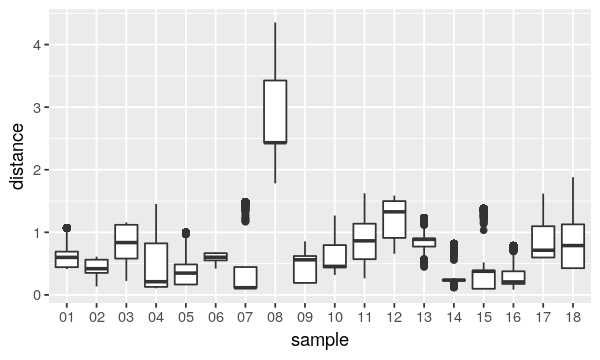

In [22]:
options(repr.plot.width = 5, repr.plot.height = 3)
ggplot(dist_sample, aes(x = sample, y = distance)) + geom_boxplot()

In [24]:
mat1 = dat_mpsk_cal_tmp %>% filter(sample == "01")
mat1 = mat1 %>% select(-sample, -cluster)

mat2 = dat_mpsk_cal_tmp %>% filter(sample == "02")
mat2 = mat2 %>% select(-sample, -cluster)

print(dim(mat1))
print(dim(mat2))

[1] 10000    10
[1] 10000    10


In [2]:
head(mat1)

ERROR: Error in head(mat1): object 'mat1' not found


In [27]:
parDist(mat1)

Warning message in if (!is.na(pmatch(method, "euclidian"))) method <- "euclidean":
“the condition has length > 1 and only the first element will be used”Warning message in if (is.na(method)) stop("invalid distance method"):
“the condition has length > 1 and only the first element will be used”

ERROR: Error in dist(as.matrix(head(mat1)), as.matrix(head(mat2))): invalid distance method


In [ ]:
solve_LSAP(x, maximum = FALSE)